In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm #color map

from sympy import symbols, diff

from mpl_toolkits.mplot3d.axes3d import Axes3D

## $$ h(x) = x^5 - 2x^4 + 4$$

In [2]:
def h(x):
    return x**5 - 2*x**4 + 4
def dh(x):
    return 5*x**4 - 8*x**3
def d2h(x):
    return 20*x**3 - 24*x**2

In [3]:
def finding(function, dfunction, first_point, epsilon, max_iter=100):
    xlist = []
    for i in range(max_iter):
        x0 = first_point - function(first_point)/dfunction(first_point)
        xlist.append(x0)
        if abs(function(x0))>epsilon:
            first_point = x0
        else:
            break
    xlist = np.array(xlist)
    return(xlist)

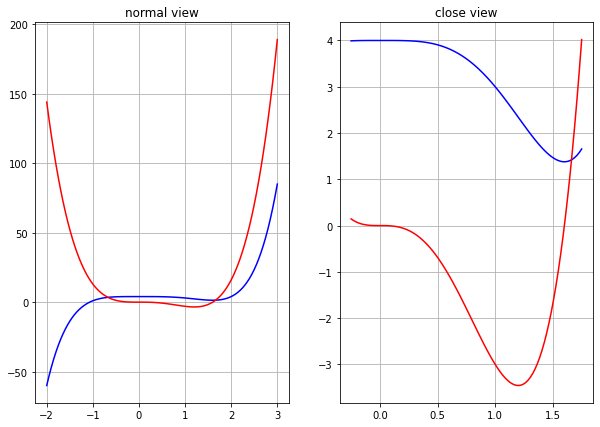

In [4]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("normal view")
x_list = np.linspace(-2, 3, 100)
plt.grid()
plt.plot(x_list, h(x_list), color="blue")
plt.plot(x_list, dh(x_list), color="red")

plt.subplot(1,2,2)
plt.title("close view")
x_list = np.linspace(-.25, 1.75, 100)
plt.grid()
plt.plot(x_list, h(x_list), color="blue")
plt.plot(x_list, dh(x_list), color="red")

In [5]:
xlist = finding(dh, d2h, 1.5, 1e-6)
print(xlist)

[1.625      1.60110294 1.60000227 1.6       ]


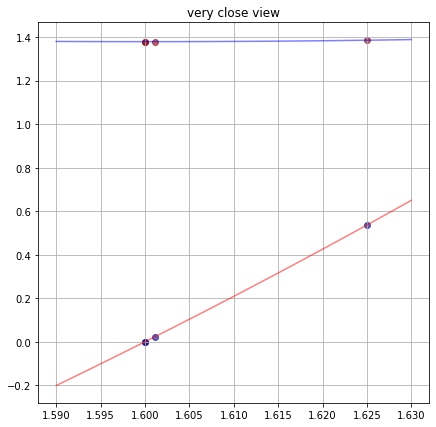

In [6]:
plt.figure(figsize=(7,7))
plt.title("very close view")
x_list = np.linspace(1.59, 1.63, 100)
plt.grid()
plt.plot(x_list, h(x_list), color="blue", alpha=.5)
plt.scatter(xlist, h(xlist), color="darkred", alpha=.6)
plt.plot(x_list, dh(x_list), color="red", alpha=.5)
plt.scatter(xlist, dh(xlist), color="darkblue", alpha=.6)

## 3D chart

## $$ f(x,y) = \frac{1}{3^{-x^2-y^2}+1} $$

In [7]:
def f2(x,y):
    return 1 / (1+ 3**(-x**2-y**2))

In [8]:
x2 = np.linspace(-2, 2, 50)
y2 = np.linspace(-2, 2, 50)

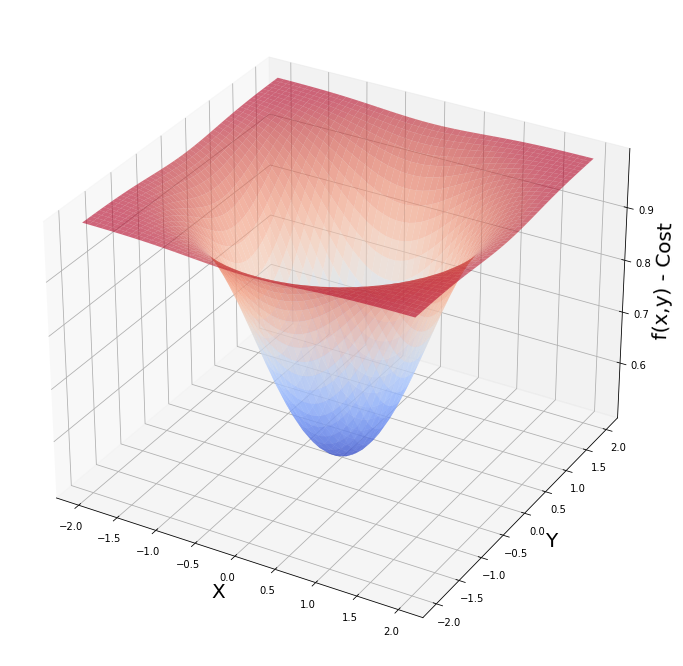

In [9]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(projection='3d') # earlier used gca()
# x2, y2 and f must be 2d!
x2, y2 = np.meshgrid(x2, y2)

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x,y) - Cost", fontsize=20)

ax.plot_surface(x2, y2, f2(x2,y2), cmap=cm.coolwarm, alpha=.6)

## Partial Derivatives & Symbolic Computation

In [10]:
a, b = symbols('x,y')
print(f2(a,b))
print(diff(f2(a, b), a))

1/(3**(-x**2 - y**2) + 1)
2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


In [11]:
print("f2(1,1.5) = ", f2(a,b).evalf(subs={a:1, b:1.5}))
print("f2x(0.75,1.25) = ", diff(f2(a, b), a).evalf(subs={a:.75, b:1.25}))

f2(1,1.5) =  0.972628235474595
f2x(0.75,1.25) =  0.132664718193120


In [17]:
max_iter = 500
h = 0.1
guess = np.array((1,1))
eps = 1e-9

for i in range(max_iter):
    f2x = diff(f2(a,b), a).evalf(subs={a:guess[0], b:guess[1]})
    f2y = diff(f2(a,b), b).evalf(subs={a:guess[0], b:guess[1]})
    f2d = np.array((f2x,f2y))
    guess = guess - h*f2d
    if f2d.all() < eps:
        break
print("optimised point : ", guess)
print("value of derivative at optimised point : ", f2d)
print("value of function at optimised point : ", f2(*guess))
print(i, "times")

optimised point :  [1.66745480625366e-9 1.66745480625366e-9]
value of derivative at optimised point :  [9.69180871228153e-10 9.69180871228153e-10]
value of function at optimised point :  0.500000000000000
364 times
